In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [1]:
import pandas as pd
!pip install --upgrade plotly

#### Exploring Data 

In [2]:
df = pd.read_csv('/content/gdrive/My Drive/Shashank Python V/Projects/DataSet/Fake-News-Classification/news_articles.csv', index_col=0)

In [3]:
df.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
df.isnull().sum()

published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(2045, 11)

In [7]:
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

**Distribution of Articles**

In [8]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [9]:
import matplotlib.pyplot as plt

In [10]:
data_for_chart = df['type'].value_counts()

In [11]:
labels_plot = df['type'].value_counts().index

In [12]:
import random
explode = [round(random.uniform(0.0, 0.21), 2) for i in range(len(df['type'].unique()))]
explode
#[0.11, 0.16, 0.21, 0.05, 0.08, 0.06, 0.02, 0.01]

[0.19, 0.18, 0.1, 0.04, 0.0, 0.17, 0.16, 0.12]

In [13]:
wedgeprops = {'linewidth' : 1, 'edgecolor': 'black'}

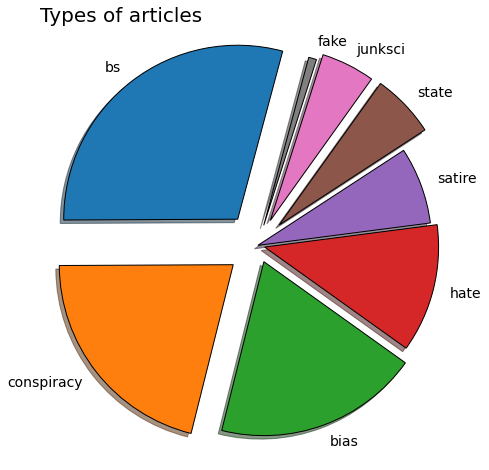

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(data_for_chart, explode = explode, shadow=True, startangle = 75, wedgeprops = wedgeprops, labels=labels_plot, textprops={'fontsize':14})
plt.title('Types of articles', fontsize=20, loc = 'left')
plt.show()

----------------------------------


**CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).**

In [15]:
 from sklearn.feature_extraction.text import CountVectorizer

#### Let's Dive in and See what is actually happening 

In [16]:
CountVectorizer().fit(df.text_without_stopwords)                                    # Vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
CountVectorizer().fit(df.text_without_stopwords).transform(df.text_without_stopwords)           # Bag of Words

<2045x46774 sparse matrix of type '<class 'numpy.int64'>'
	with 385743 stored elements in Compressed Sparse Row format>

In [18]:
CountVectorizer().fit(df.text_without_stopwords).transform(df.text_without_stopwords).sum(axis=0)  # Sum_Words

matrix([[9, 1, 4, ..., 3, 1, 1]], dtype=int64)

In [119]:
CountVectorizer().fit(df.text_without_stopwords).vocabulary_.items()

In [20]:
CountVectorizer().fit(df.text_without_stopwords).transform(df.text_without_stopwords).sum(axis=0)[0, 26755] 
# Count of word 'money' (index of money) -> 26755, you can see above 

484

In [21]:
sum_words = CountVectorizer().fit(df.text_without_stopwords).transform(df.text_without_stopwords).sum(axis=0)

In [22]:
# [(word, sum_words[0, index]) for word, index in CountVectorizer().fit(df.text_without_stopwords).vocabulary_.items()]

We need to do this for Each item in the Dictionary So, We can write a function to achieve what we want

In [23]:
def get_top_n_unigrams(corpus, n=None):
  vec =  CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  word_count = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  word_count = sorted(word_count, key= lambda x: x[1], reverse=True)
  return word_count[:n]

In [24]:
def get_top_n_bigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words =  vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  word_count = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [25]:
def get_top_n_trigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  word_count = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]


In [26]:
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot


In [27]:
plt.style.use('fivethirtyeight')

In [28]:
common_words = get_top_n_unigrams(df['text_without_stopwords'], 20)
common_words

[('trump', 3382),
 ('clinton', 3052),
 ('one', 2368),
 ('us', 2349),
 ('said', 2322),
 ('people', 2267),
 ('would', 2212),
 ('hillary', 2047),
 ('also', 1727),
 ('like', 1672),
 ('election', 1453),
 ('new', 1444),
 ('time', 1380),
 ('even', 1362),
 ('state', 1239),
 ('president', 1192),
 ('get', 1147),
 ('could', 1147),
 ('campaign', 1135),
 ('many', 1092)]

In [29]:
# df_unigram = pd.DataFrame(common_words,columns=['Words','Count'])
# df_unigram.groupby('Words').sum()['Count']

Text(0.5, 1.0, 'Top 20 Unigrams in articles')

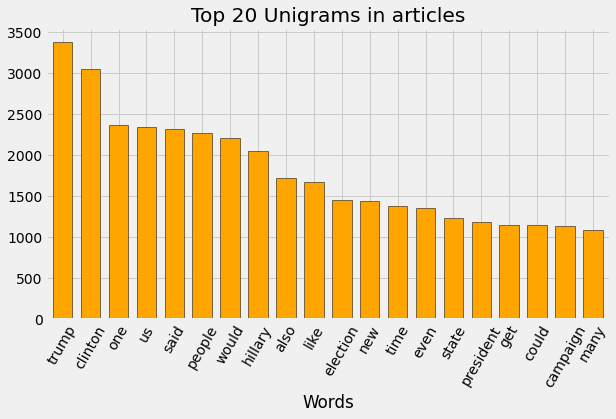

In [30]:
df_unigram = pd.DataFrame(common_words,columns=['Words','Count'])
df_unigram.groupby('Words').sum()['Count'].sort_values(ascending=False).plot(kind='bar', figsize= (9, 5), color= 'orange', edgecolor='black', 
                                                                            width = 0.7)
plt.xticks(rotation = 60)
plt.title('Top 20 Unigrams in articles')

In [31]:
common_words = get_top_n_bigrams(df.text_without_stopwords, n=20)

Text(0.5, 1.0, 'Top 20 Bigrams in articles')

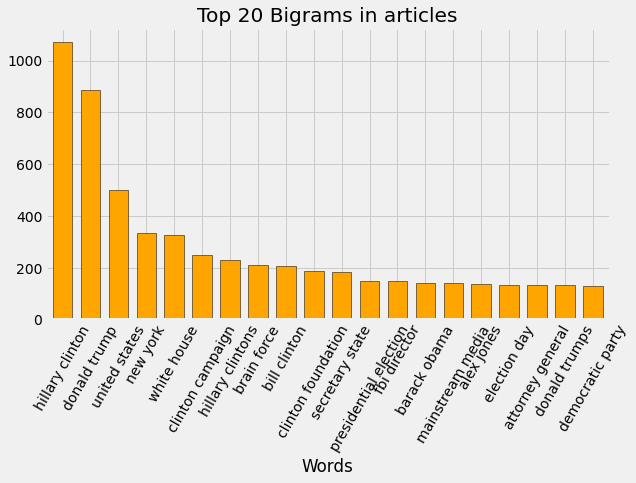

In [32]:
df_bigram = pd.DataFrame(common_words, columns = ['Words', 'Count'])
df_bigram.groupby('Words').sum()['Count'].sort_values(ascending=False).plot(kind='bar', figsize= (9, 5), color= 'orange', edgecolor='black', 
                                                                            width = 0.7)
plt.xticks(rotation = 60)
plt.title('Top 20 Bigrams in articles')

**WordCloud**

In [33]:
from wordcloud import WordCloud

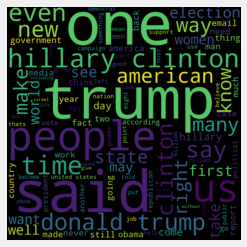

In [34]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df.text_without_stopwords))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Articles with Image

In [35]:
df.groupby(['hasImage', 'label']).count()
# df[df.hasImage == 1].groupby('label').count().reset_index()

published  ...  text_without_stopwords
hasImage label             ...                        
0.0      Fake         340  ...                     340
         Real         125  ...                     125
1.0      Fake         951  ...                     951
         Real         629  ...                     629

[4 rows x 9 columns]

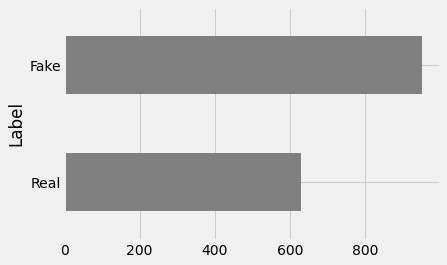

In [36]:
df[df.hasImage == 1].groupby('label').count()['hasImage'].plot(kind = 'barh', color = 'grey')
plt.gca().invert_yaxis()
plt.ylabel('Label')
plt.show()            

**Let's Analyse Article Images**

In [37]:
df.columns

Index(['published', 'title', 'text', 'language', 'site_url', 'main_img_url',
       'type', 'label', 'title_without_stopwords', 'text_without_stopwords',
       'hasImage'],
      dtype='object')

In [38]:
# df_image_sources = df[~(df.main_img_url == 'No Image URL')]
df_image_sources = df[['site_url','label','main_img_url']]
df_image_sources.shape

(2045, 3)

In [39]:
df_image_sources.head()

,site_url,label,main_img_url
author,,,
Barracuda Brigade,100percentfedup.com,Real,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
reasoning with facts,100percentfedup.com,Real,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
Barracuda Brigade,100percentfedup.com,Real,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
Fed Up,100percentfedup.com,Real,http://100percentfedup.com/wp-content/uploads/...
Fed Up,100percentfedup.com,Real,http://100percentfedup.com/wp-content/uploads/...


In [40]:
df_image_source_Real = df_image_sources[df_image_sources.label == 'Real'].iloc[5:10]
df_image_source_Fake = df_image_sources[df_image_sources.label == 'Fake'].iloc[0:5]

In [41]:
def download_image(path):
    return '<img src="'+ path + '" width="100">'

In [42]:
from IPython.core.display import HTML

In [43]:
HTML(df_image_source_Real.to_html(escape=False,formatters=dict(main_img_url=download_image)))

,site_url,label,main_img_url
author,,,
Barracuda Brigade,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,


In [44]:
HTML(df_image_source_Fake.to_html(escape=False,formatters=dict(main_img_url=download_image)))

,site_url,label,main_img_url
author,,,
No Author,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,
Mike Rivero,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,


**Checking Sites/ URL's**


In [45]:
df.columns

Index(['published', 'title', 'text', 'language', 'site_url', 'main_img_url',
       'type', 'label', 'title_without_stopwords', 'text_without_stopwords',
       'hasImage'],
      dtype='object')

In [46]:
df.site_url.unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [47]:
df.site_url.value_counts()[df.site_url.value_counts() > 50]

naturalnews.com          100
infowars.com             100
frontpagemag.com         100
westernjournalism.com    100
presstv.ir               100
awdnews.com              100
clickhole.com            100
returnofkings.com        100
prisonplanet.com         100
politicususa.com         100
activistpost.com         100
abeldanger.net            82
dailywire.com             81
der-postillon.com         72
ahtribune.com             67
abovetopsecret.com        53
wnd.com                   51
Name: site_url, dtype: int64

In [48]:
df[df.site_url == 'awdnews.com']['label'].value_counts()

Fake    100
Name: label, dtype: int64

In [49]:
df[df.site_url == 'infowars.com']['label'].value_counts()

Fake    100
Name: label, dtype: int64

In [50]:
df[df.site_url == 'wnd.com']['label'].value_counts()

Real    51
Name: label, dtype: int64

In [51]:
df[df.site_url == 'westernjournalism.com']['label'].value_counts()

Real    98
Fake     2
Name: label, dtype: int64

In [52]:
df.groupby(['site_url', 'label']).count()['type']

site_url                label
100percentfedup.com     Real     33
21stcenturywire.com     Fake     24
abcnews.com.co          Fake      2
abeldanger.net          Fake     82
abovetopsecret.com      Fake     53
                                 ..
westernjournalism.com   Fake      2
                        Real     98
whatreallyhappened.com  Fake     10
whydontyoutrythis.com   Real      2
wnd.com                 Real     51
Name: type, Length: 77, dtype: int64

**Label Encoding**

In [53]:
import numpy as np

In [54]:
df_image_sources.label.value_counts()

Fake    1291
Real     754
Name: label, dtype: int64

In [55]:
pd.set_option('mode.chained_assignment', None)

Read More here:
https://www.dataquest.io/blog/settingwithcopywarning/

In [56]:
df_image_sources.label = np.where(df_image_sources.label == 'Real', 0, 1)

In [57]:
df_image_sources.label.value_counts()

1    1291
0     754
Name: label, dtype: int64

In [58]:
df_image_sources.head()

,site_url,label,main_img_url
author,,,
Barracuda Brigade,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
reasoning with facts,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
Barracuda Brigade,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...
Fed Up,100percentfedup.com,0,http://100percentfedup.com/wp-content/uploads/...
Fed Up,100percentfedup.com,0,http://100percentfedup.com/wp-content/uploads/...


In [59]:
tuple(df_image_sources.iterrows())[0]

('Barracuda Brigade',
 site_url                                      100percentfedup.com
 label                                                           0
 main_img_url    http://bb4sp.com/wp-content/uploads/2016/10/Fu...
 Name: Barracuda Brigade, dtype: object)

In [60]:
tuple(df_image_sources.iterrows())[0][1]['site_url']

'100percentfedup.com'

In [61]:
df_image_sources.groupby(['label', 'site_url']).count().index

MultiIndex([(0,            '100percentfedup.com'),
            (0,              'addictinginfo.org'),
            (0,                  'dailywire.com'),
            (0,                  'davidduke.com'),
            (0, 'fromthetrenchesworldreport.com'),
            (0,               'frontpagemag.com'),
            (0,                 'newstarget.com'),
            (0,               'politicususa.com'),
            (0,                    'presstv.com'),
            (0,                     'presstv.ir'),
            (0,               'prisonplanet.com'),
            (0,               'proudemocrat.com'),
            (0,            'redstatewatcher.com'),
            (0,              'returnofkings.com'),
            (0,            'washingtonsblog.com'),
            (0,          'westernjournalism.com'),
            (0,          'whydontyoutrythis.com'),
            (0,                        'wnd.com'),
            (1,            '21stcenturywire.com'),
            (1,                

In [62]:
df_image_sources.groupby(['label', 'site_url']).count().index[0:5]

MultiIndex([(0,            '100percentfedup.com'),
            (0,              'addictinginfo.org'),
            (0,                  'dailywire.com'),
            (0,                  'davidduke.com'),
            (0, 'fromthetrenchesworldreport.com')],
           names=['label', 'site_url'])

In [63]:
real_url, fake_url = [], []
for label, site_url in df_image_sources.groupby(['label', 'site_url']).count().index:
  if label == 0:
    real_url.append(site_url)
  else:
    fake_url.append(site_url) 

#### Real News Websites

In [64]:
print(real_url)

['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']


#### Fake News Websites

In [65]:
print(fake_url)

['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com', 'themindunleashed.com', 'theo

####Real and Fake News Websites

In [66]:
print(set(real_url) & set(fake_url))

{'washingtonsblog.com', 'returnofkings.com', 'newstarget.com', 'presstv.ir', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'westernjournalism.com', 'prisonplanet.com'}


#### Type of Article Vs Label

In [67]:
df.groupby(['type', 'label']).count()

,,published,title,text,language,site_url,main_img_url,title_without_stopwords,text_without_stopwords,hasImage
type,label,,,,,,,,,
bias,Real,389,389,389,389,389,389,389,389,389
bs,Fake,598,598,598,598,598,598,598,598,598
conspiracy,Fake,430,430,430,430,430,430,430,430,430
fake,Fake,15,15,15,15,15,15,15,15,15
hate,Real,244,244,244,244,244,244,244,244,244
junksci,Fake,102,102,102,102,102,102,102,102,102
satire,Fake,146,146,146,146,146,146,146,146,146
state,Real,121,121,121,121,121,121,121,121,121


In [68]:
# df[(df['type'] == 'bias') & (df.label == 'Fake')]                                # 0 

In [69]:
data_for_chart = df.groupby(['type', 'label']).count()['published'].reset_index(name='Counts')
data_for_chart.sort_values(by='Counts', ascending=False, inplace=True)

In [70]:
import seaborn as sns

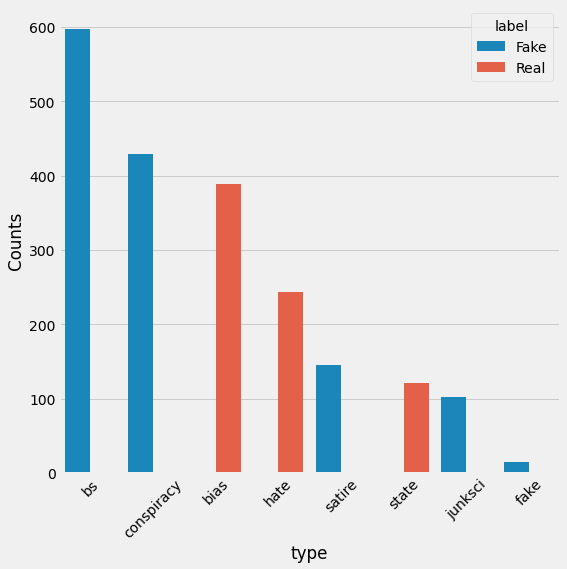

In [71]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_for_chart['type'], y=data_for_chart['Counts'], hue=data_for_chart['label'])
plt.xticks(rotation=45)
plt.show()

In [72]:
import plotly.express as px

In [73]:
fig = px.sunburst(data_frame = data_for_chart, path=['label', 'type'], values='Counts',title="Types of article (Label)", width=500, height=500)
fig.show()

--------------------------------------------------------

#### Websites and type of article 

In [74]:
df_image_sources['type'] = df['type']

In [75]:
df_image_sources.head()

,site_url,label,main_img_url,type
author,,,,
Barracuda Brigade,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias
reasoning with facts,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias
Barracuda Brigade,100percentfedup.com,0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias
Fed Up,100percentfedup.com,0,http://100percentfedup.com/wp-content/uploads/...,bias
Fed Up,100percentfedup.com,0,http://100percentfedup.com/wp-content/uploads/...,bias


In [76]:
dictionary = dict()
multi_index = df_image_sources.groupby(['type', 'site_url']).count().index

for k, v in multi_index:
  # print(k, v)
  if k in dictionary:
    dictionary[k].extend([v])
  else:
    dictionary[k] = [v]  

In [77]:
dictionary

{'bias': ['100percentfedup.com',
  'addictinginfo.org',
  'dailywire.com',
  'newstarget.com',
  'politicususa.com',
  'prisonplanet.com',
  'proudemocrat.com',
  'washingtonsblog.com',
  'westernjournalism.com',
  'whydontyoutrythis.com',
  'wnd.com'],
 'bs': ['abeldanger.net',
  'abovetopsecret.com',
  'ahtribune.com',
  'allnewspipeline.com',
  'americannews.com',
  'americasfreedomfighters.com',
  'amren.com',
  'amtvmedia.com',
  'barenakedislam.com',
  'coasttocoastam.com',
  'corbettreport.com',
  'countercurrents.org',
  'counterpunch.org',
  'darkmoon.me',
  'davidduke.com',
  'davidstockmanscontracorner.com',
  'davidwolfe.com',
  'dcclothesline.com',
  'defenddemocracy.press',
  'dennismichaellynch.com',
  'departed.co',
  'der-postillon.com',
  'fromthetrenchesworldreport.com',
  'frontpagemag.com',
  'galacticconnection.com',
  'infowars.com',
  'legorafi.fr',
  'projectveritas.com',
  'returnofkings.com',
  'shiftfrequency.com',
  'thedailysheeple.com',
  'theeconomiccoll

In [78]:
for k in dictionary:
  print(f'Websites for type {k}: {dictionary[k]}')

Websites for type bias: ['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'newstarget.com', 'politicususa.com', 'prisonplanet.com', 'proudemocrat.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']
Websites for type bs: ['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'infowars.com', 'legorafi.fr', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com', 'themindu

--------------------------------------------------------------------------------


### **Model Selection**

#### **Train Test Split**

In [79]:
df.sample(frac = 0.5).shape                 # Generates 50% sample of data frame

(1022, 11)

In [80]:
df_train_test = df.sample(frac = 1) 

In [81]:
df_train_test.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Anonymous,2016-10-27T22:57:00.000+03:00,no title,field is correct about the a companies and tru...,english,abeldanger.net,No Image URL,bs,Fake,title,field correct companies trump correct china ht...,0.0
Jason Easley,2016-10-26T21:28:47.404+03:00,trump throws a fit when asked why he is promot...,by sarah jones on sat oct th at pm donald tr...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,Real,three new polls shatter myth presidential elec...,share twitter print post fbi examining hillary...,1.0
noreply@blogger.com (Der Postillon),2016-11-17T14:33:44.282+02:00,von wegen staatsbesuch barack obama ist ganz e...,freitag november zu unseriös auch lothar mat...,german,der-postillon.com,https://1.bp.blogspot.com/-u3i2ZmS2vdo/WC3Ufx-...,bs,Fake,newsticker,freitag november junge brunnen gefallen suchtr...,1.0
Letsbereal,2016-10-26T17:25:00.000+03:00,messagingapp comp lines profit misses estimate...,home this month popular is western civilizatio...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,cuckservatism topic previously discussed detai...,0.0
Kingdom Ambassador,2016-10-31T13:50:11.728+02:00,comment on if hillary clinton is charged with ...,what is going on with wikileaks tweet wikilea...,english,dcclothesline.com,http://i2.wp.com/www.dcclothesline.com/wp-cont...,bs,Fake,comment michelle obama replacement nominee fbi...,arrested protest dakota access pipeline shares...,1.0


In [82]:
df_train_test['type'].unique()

array(['bs', 'bias', 'conspiracy', 'state', 'satire', 'junksci', 'hate',
       'fake'], dtype=object)

In [83]:
unique_type = df_train_test['type'].unique()
print({k:v for v, k in enumerate(unique_type)})
# {'bs': 0, 'conspiracy': 1, 'bias': 2, 'state': 3, 'hate': 4, 'junksci': 5, 'satire': 6, 'fake': 7}    # Adaboost 95%
# {'hate': 0, 'bs': 1, 'conspiracy': 2, 'bias': 3, 'satire': 4, 'junksci': 5, 'state': 6, 'fake': 7}    # AdaBoost 97%

{'bs': 0, 'bias': 1, 'conspiracy': 2, 'state': 3, 'satire': 4, 'junksci': 5, 'hate': 6, 'fake': 7}


In [84]:
df_train_test['type'] = df_train_test['type'].map({k:v for v, k in enumerate(unique_type)})

In [85]:
df_train_test['type'].value_counts()

0    598
2    430
1    389
6    244
4    146
3    121
5    102
7     15
Name: type, dtype: int64

In [86]:
X = df_train_test[['site_url', 'text_without_stopwords']]
y = df_train_test['type']

In [87]:
X.head()

,site_url,text_without_stopwords
author,,
Anonymous,abeldanger.net,field correct companies trump correct china ht...
Jason Easley,politicususa.com,share twitter print post fbi examining hillary...
noreply@blogger.com (Der Postillon),der-postillon.com,freitag november junge brunnen gefallen suchtr...
Letsbereal,prisonplanet.com,cuckservatism topic previously discussed detai...
Kingdom Ambassador,dcclothesline.com,arrested protest dakota access pipeline shares...


In [88]:
X['source'] = X['site_url'] + ' ' + X['text_without_stopwords']

In [89]:
X['source']

author
Anonymous                              abeldanger.net field correct companies trump c...
Jason Easley                           politicususa.com share twitter print post fbi ...
noreply@blogger.com (Der Postillon)    der-postillon.com freitag november junge brunn...
Letsbereal                             prisonplanet.com cuckservatism topic previousl...
Kingdom Ambassador                     dcclothesline.com arrested protest dakota acce...
                                                             ...                        
noreply@blogger.com (Der Postillon)    der-postillon.com freitag november gaagnagna z...
No Author                              clickhole.com email looks like presidentelect ...
No Author                              westernjournalism.com another suggestion would...
No Author                              addictinginfo.org november pm weve seen pictur...
Jason Easley                           politicususa.com sarah jones sun oct th pm sen...
Name: source, 

In [90]:
X = X['source']

In [91]:
X.head()

author
Anonymous                              abeldanger.net field correct companies trump c...
Jason Easley                           politicususa.com share twitter print post fbi ...
noreply@blogger.com (Der Postillon)    der-postillon.com freitag november junge brunn...
Letsbereal                             prisonplanet.com cuckservatism topic previousl...
Kingdom Ambassador                     dcclothesline.com arrested protest dakota acce...
Name: source, dtype: object

In [92]:
y.head()

author
Anonymous                              0
Jason Easley                           1
noreply@blogger.com (Der Postillon)    0
Letsbereal                             2
Kingdom Ambassador                     0
Name: type, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [95]:
x_train.shape, x_test.shape

((1431,), (614,))

### **TfidVectorizer**

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
tf = TfidfVectorizer(stop_words='english') 
tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [98]:
tf.fit_transform(x_train)

<1431x38614 sparse matrix of type '<class 'numpy.float64'>'
	with 241844 stored elements in Compressed Sparse Row format>

In [99]:
tf_X_train  = tf.fit_transform(x_train)

In [100]:
tf.transform(x_test)

<614x38614 sparse matrix of type '<class 'numpy.float64'>'
	with 107437 stored elements in Compressed Sparse Row format>

In [101]:
tf_X_test =  tf.transform(x_test)

In [102]:
tf.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>

In [118]:
tf_X_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06938998, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [104]:
pd.DataFrame(tf_X_train.A, columns= tf.get_feature_names()).head()

,100percentfedup,21stcenturywire,aa,aab,aafe,aah,aali,aaliya,aaliyas,aand,aap,aaps,aaron,ab,aba,aback,abajo,abandon,abandoned,abandoning,abandonment,abandons,abated,abbas,abbasside,abbatoir,abbey,abbott,abbotts,abbreviated,abbreviation,abby,abc,abcdisney,abcnbccbsapbsnprcnnwashingtonpostpolitico,abcnews,abcpolitics,abcs,abd,abdallah,...,éxito,être,öffentlich,öffentlichen,ökonom,últimos,übeltäter,über,überall,überflug,übergegangen,übergestreift,überhaupt,überkommen,überlaufen,überlege,überlegen,überlegene,überlegt,überlegung,überlisten,übermenschen,übermenschliche,übermüdete,übernehmen,überraschen,überraschend,überraschende,überrascht,überreden,überreicht,überschwänglich,überteuerten,übertrieben,überwachungskamera,überwältigen,überzeugt,übrig,übrige,übte
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.06939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **AdaBoost and RandomForest Classifiers**

In [105]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [106]:
adBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=5, random_state=1)
adBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [107]:
adBoost.fit(tf_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [108]:
prediction = adBoost.predict(tf_X_test)

In [109]:
metrics.accuracy_score(y_test, prediction)

0.9657980456026058

In [110]:
print("AdaBoost Score: %0.5f" %metrics.accuracy_score(y_test, prediction))

AdaBoost Score: 0.96580


In [111]:
rf =  RandomForestClassifier(n_estimators=100, random_state=42)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
rf.fit(tf_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [113]:
prediction = rf.predict(tf_X_test)

In [114]:
metrics.accuracy_score(y_test, prediction)

0.8550488599348535

In [115]:
print("RandomForest Score: %0.4f" %metrics.accuracy_score(y_test, prediction))

RandomForest Score: 0.8550
